# Research Questions

In [142]:
import pandas as pd
import numpy as np
# read csv file
df = pd.read_csv("employee.csv", sep=",")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Q.1) What is the distribution of educational qualifications among employees?  
ans:  
     1) Bachelor's - 77.39%    
     2) Master's - 18.76%  
     3) PHD - 3.84%    

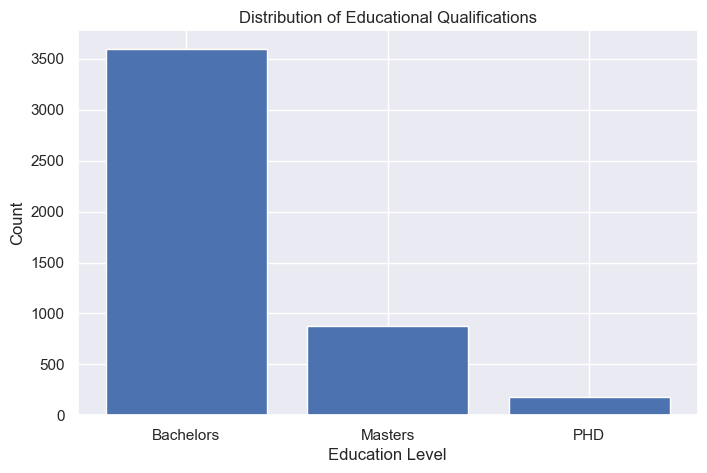

In [143]:
import matplotlib.pyplot as plt
education_counts = df['Education'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(education_counts.index, education_counts.values)
plt.title('Distribution of Educational Qualifications')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Q.2) How does the length of service (Joining Year) vary across different cities?  
ans:   
     1) Pune -   
     2) Bangalore -   
     3) Delhi -  

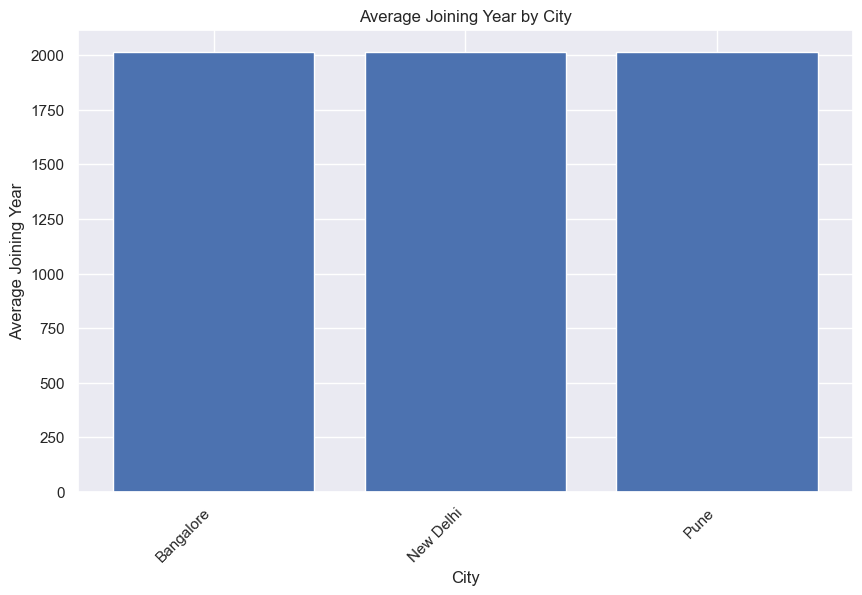

In [144]:
# Calculate the average joining year for each city
city_avg_joining_year = df.groupby('City')['JoiningYear'].mean()
plt.figure(figsize=(10, 6))
plt.bar(city_avg_joining_year.index, city_avg_joining_year.values)
plt.title('Average Joining Year by City')
plt.xlabel('City')
plt.ylabel('Average Joining Year')
plt.xticks(rotation=0)
plt.show()

Q.3) Is there a correlation between Payment Tier and Experience in Current Domain?  
ans: Yes, there is a correlation between Payment Tier and Experience in Current Domain.  

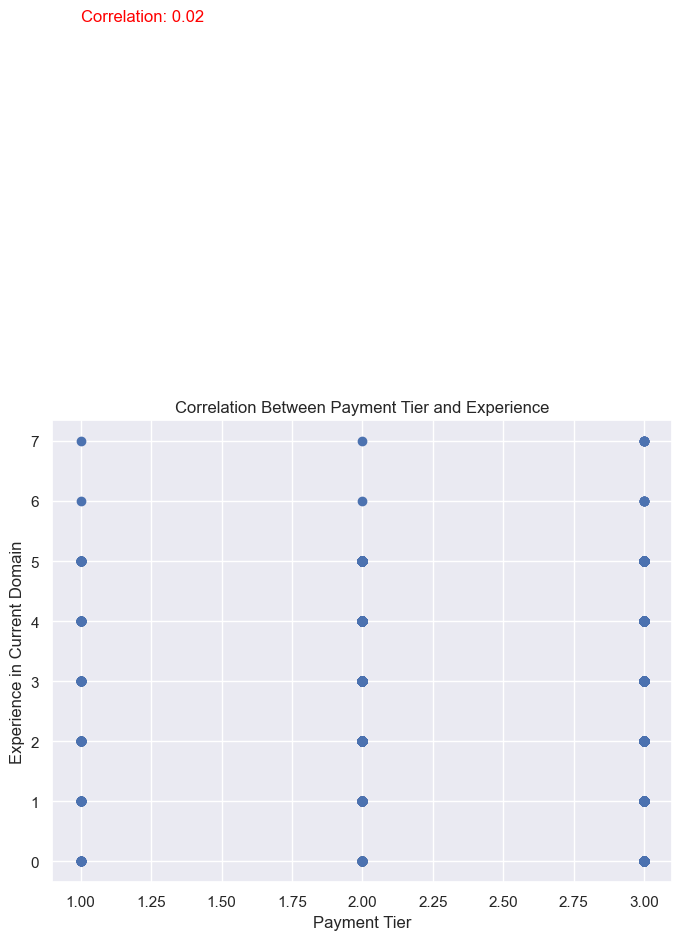

In [145]:
# Calculate Pearson's correlation coefficient
correlation = df['PaymentTier'].corr(df['ExperienceInCurrentDomain'])
plt.figure(figsize=(8, 6))
plt.scatter(df['PaymentTier'], df['ExperienceInCurrentDomain'])
plt.title('Correlation Between Payment Tier and Experience')
plt.xlabel('Payment Tier')
plt.ylabel('Experience in Current Domain')
plt.text(1, 14, f'Correlation: {correlation:.2f}', fontsize=12, color='red')
plt.show()

Q.4) What is the gender distribution within the workforce?  
ans:  
    1) Female: 40.3%  
    2) Male: 59.7%  


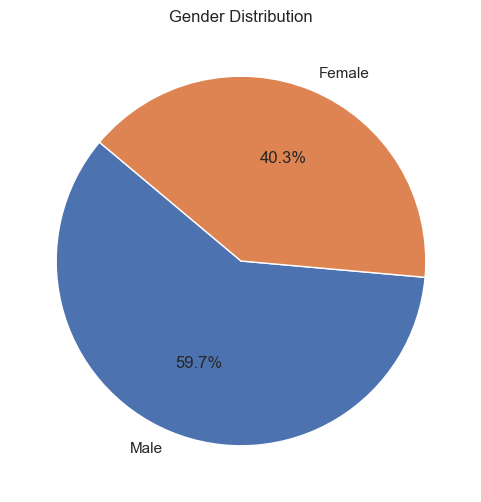

In [146]:
# Count the frequency of each gender
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()


Q.5) Are there any patterns in leave-taking behavior among employees?  
ans: 

# Pre-Processing of Data

In [147]:
print(df.Education.unique())
print(df.City.unique())
print(df.JoiningYear.unique())

['Bachelors' 'Masters' 'PHD']
['Bangalore' 'Pune' 'New Delhi']
[2017 2013 2014 2016 2015 2012 2018]


In [148]:
df_string = df.select_dtypes(include=['object'])
df_string = df_string.apply(lambda x: pd.factorize(x)[0])
df[df_string.columns] = df_string
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,0,0,0,0
1,0,2013,1,1,28,1,0,3,1
2,0,2014,2,3,38,1,0,2,0
3,1,2016,0,3,27,0,0,5,1
4,1,2017,1,3,24,0,1,2,1


In [149]:
df.describe()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653.00000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,0.26456,2015.062970,0.769826,2.698259,29.393295,0.402966,0.102729,2.905652,0.343864
std,0.52112,1.863377,0.821372,0.561435,4.826087,0.490547,0.303638,1.558240,0.475047
min,0.00000,2012.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,2013.000000,0.000000,3.000000,26.000000,0.000000,0.000000,2.000000,0.000000
50%,0.00000,2015.000000,1.000000,3.000000,28.000000,0.000000,0.000000,3.000000,0.000000
75%,0.00000,2017.000000,1.000000,3.000000,32.000000,1.000000,0.000000,4.000000,1.000000
max,2.00000,2018.000000,2.000000,3.000000,41.000000,1.000000,1.000000,7.000000,1.000000


In [150]:
df.to_csv("employee-processed.csv", index=False)

In [151]:
new_df = pd.read_csv("employee-processed.csv", sep=",")
new_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,0,0,0,0
1,0,2013,1,1,28,1,0,3,1
2,0,2014,2,3,38,1,0,2,0
3,1,2016,0,3,27,0,0,5,1
4,1,2017,1,3,24,0,1,2,1


# Comparision of different models

In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import os

In [153]:
data = pd.read_csv("employee-processed.csv", sep=",")
data = pd.get_dummies(data, drop_first=True)
data = data.dropna()

In [154]:
X = data.drop("LeaveOrNot", axis=1)  # Features
y = data["LeaveOrNot"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [156]:
naive_bayes.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [157]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return acc, cm

nb_accuracy, nb_confusion_matrix = evaluate_model(naive_bayes, X_test, y_test)
dt_accuracy, dt_confusion_matrix = evaluate_model(decision_tree, X_test, y_test)
rf_accuracy, rf_confusion_matrix = evaluate_model(random_forest, X_test, y_test)

In [158]:
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Confusion Matrix:\n", nb_confusion_matrix)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:\n", dt_confusion_matrix)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)

Naive Bayes Accuracy: 0.6659505907626209
Naive Bayes Confusion Matrix:
 [[482 128]
 [183 138]]
Decision Tree Accuracy: 0.8345864661654135
Decision Tree Confusion Matrix:
 [[544  66]
 [ 88 233]]
Random Forest Accuracy: 0.8442534908700322
Random Forest Confusion Matrix:
 [[556  54]
 [ 91 230]]
